# Modell zur Vorhersage der Popularität von Tracks
In diesem Notizbuch werde ich ein maschinelles Lernmodell erstellen, um die Popularität von Titeln auf der Grundlage ihrer Lautstärke (Loudness) vorherzusagen.
# Vorbereitung der Daten
Zuerst laden wir die notwendigen Bibliotheken und unseren Datensatz:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Laden von Daten
spotify_data = pd.read_excel('spotify.xlsx')

# Anzeigen der ersten Datenzeilen
spotify_data.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


# Aufteilung des Datensatzes in Test- und Trainingsstichproben
Unterteilen wir unseren Datensatz in Test- und Trainingsstichproben:

In [16]:
# Definieren Sie die Attribute (X) und die Zielvariable (y)
X = spotify_data[['loudness']]  # Attribute - Lautstärke verfolgen
y = spotify_data['track_popularity']  # Die Zielvariable ist die Popularität des Tracks

# Aufteilung der Daten in Trainings- und Testsätze (80% und 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Grösse der Trainingsmenge: {X_train.shape[0]} Datensätze")
print(f"Grösse der Testmenge: {X_test.shape[0]} Datensätze")

Grösse der Trainingsmenge: 1348 Datensätze
Grösse der Testmenge: 338 Datensätze


# Algorithmusauswahl und Modellerstellung
Wir müssen einen geeigneten Algorithmus aus Sklearn auswählen. Für unsere Aufgabe habe ich mich für die lineare Regression entschieden, weil die lineare Regression eine einfache Interpretation der Auswirkung der Lautstärke auf die Popularität der Tracks ermöglicht, unsere Zielvariable kontinuierlich ist, die lineare Regression effizient für große Datensätze ist und das lineare Modell ein Ausgangspunkt sein wird, um es in Zukunft mit komplexeren Modellen zu vergleichen.

In [17]:
# Erstellen eines linearen Regressionsmodells
model = LinearRegression()

# Training des Modells mit Trainingsdaten
model.fit(X_train, y_train)

# Ausgabe der Modellkoeffizienten
print(f"Neigungskoeffizient: {model.coef_[0]}")
print(f"Freies Rollen: {model.intercept_}")

Neigungskoeffizient: 0.15501398705599784
Freies Rollen: 76.89216022279244


# Modell-Validierung
Überprüfen wir, wie gut unser Modell funktioniert, indem wir Vorhersagen für einen Testdatensatz erstellen:

In [18]:
# Vorhersagen für den Testsatz
y_pred = model.predict(X_test)

# Berechnung von Metriken
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mittlerer quadratischer Fehler (MSE): {mse:.2f}")
print(f"Mittlerer absoluter Fehler (MAE): {mae:.2f}")
print(f"Bestimmungskoeffizient (R²): {r2:.2f}")

Mittlerer quadratischer Fehler (MSE): 33.91
Mittlerer absoluter Fehler (MAE): 4.79
Bestimmungskoeffizient (R²): 0.01


# Visualisierung der Ergebnisse
Lassen Sie uns die Ergebnisse unseres Modells visualisieren, um besser zu verstehen, wie sich die Vorhersagen zu den tatsächlichen Werten verhalten:

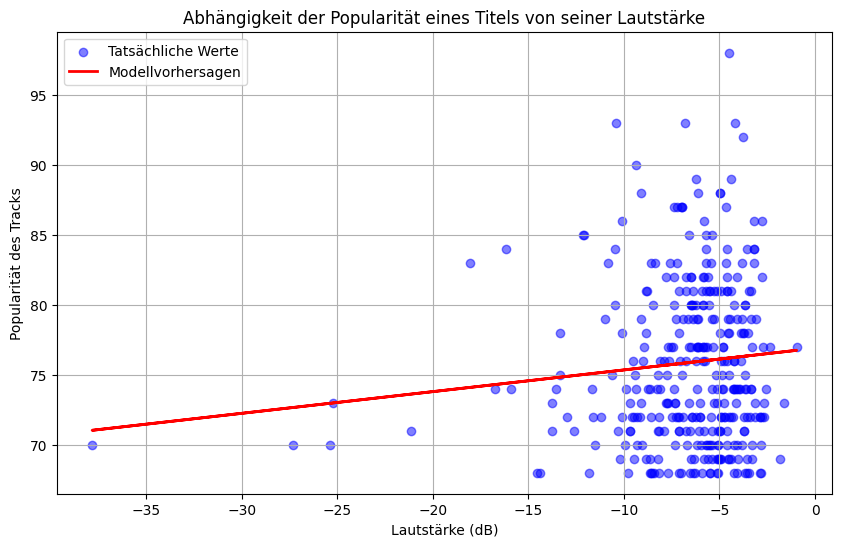

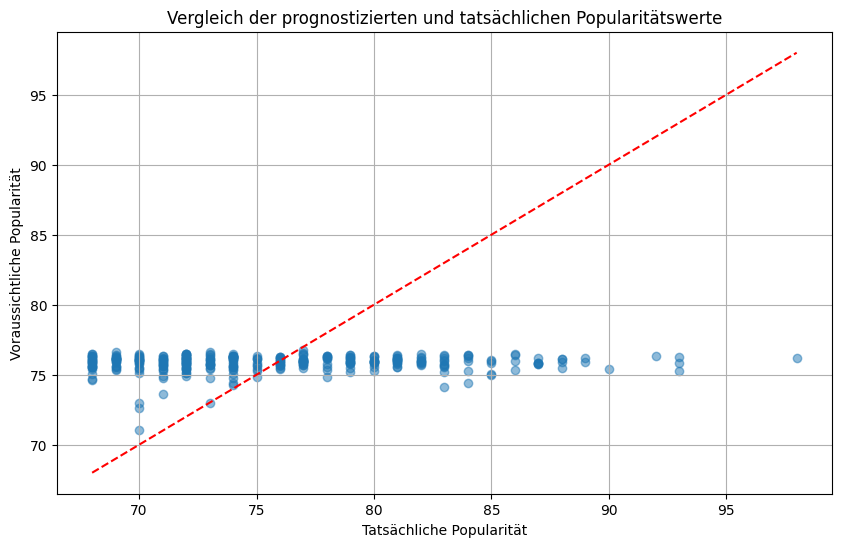

In [19]:
# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Tatsächliche Werte')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Modellvorhersagen')
plt.title('Abhängigkeit der Popularität eines Titels von seiner Lautstärke')
plt.xlabel('Lautstärke (dB)')
plt.ylabel('Popularität des Tracks')
plt.legend()
plt.grid(True)
plt.show()

# Vergleich von prognostizierten und tatsächlichen Werten
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Vergleich der prognostizierten und tatsächlichen Popularitätswerte')
plt.xlabel('Tatsächliche Popularität')
plt.ylabel('Voraussichtliche Popularität')
plt.grid(True)
plt.show()

# Manuelle Überprüfung der Aussagekraft von Vorhersagen
Lassen Sie uns nun die Aussagekraft einiger Vorhersagen aus dem Testdatensatz manuell überprüfen:

In [20]:
# Auswahl von Zufallsdatensätzen aus der Testmenge
sample_indices = np.random.choice(X_test.index, 5, replace=False)
samples = spotify_data.loc[sample_indices, ['loudness', 'track_popularity']]

# Vorhersage der Popularität für ausgewählte Datensätze
sample_predictions = model.predict(samples[['loudness']].values.reshape(-1, 1))

# Vergleichende Tabellenausgabe
comparison = pd.DataFrame({
    'Lautstärke': samples['loudness'].values,
    'Echte Popularität': samples['track_popularity'].values,
    'Voraussichtliche Popularität': sample_predictions,
    'Absoluter Fehler': np.abs(samples['track_popularity'].values - sample_predictions)
})

print("Vergleich der Vorhersagen mit den tatsächlichen Werten für zufällige Aufzeichnungen:")
print(comparison)

Vergleich der Vorhersagen mit den tatsächlichen Werten für zufällige Aufzeichnungen:
   Lautstärke  Echte Popularität  Voraussichtliche Popularität  \
0      -3.371                 74                     76.369608   
1      -5.729                 70                     76.004085   
2      -6.635                 79                     75.863642   
3      -4.460                 79                     76.200798   
4      -6.142                 77                     75.940064   

   Absoluter Fehler  
0          2.369608  
1          6.004085  
2          3.136358  
3          2.799202  
4          1.059936  


C:\Users\wh01s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Schlussfolgerungen
Nach der Analyse der Ergebnisse unseres linearen Regressionsmodells zur Vorhersage der Titelpopularität auf der Grundlage der Titel-Lautheit können folgende Schlussfolgerungen gezogen werden:

Das Modell weist ein relativ niedriges Bestimmtheitsmass auf, was auf eine schwache lineare Beziehung zwischen der Lautstärke und der Popularität der Tracks hinweist. Dies stimmt mit unseren vorläufigen Beobachtungen aus data_description.ipynb überein.
Der mittlere absolute Fehler der Vorhersagen deutet darauf hin, dass die Modellvorhersagen im Durchschnitt um einige Punkte auf der Beliebtheitsskala von den tatsächlichen Beliebtheitswerten abweichen.
Die Visualisierung der Ergebnisse bestätigt, dass die Lautstärke eines Titels kein starker Prädiktor für seine Popularität ist - die Punkte auf dem Diagramm, das die tatsächlichen und die vorhergesagten Werte vergleicht, sind stark um die Linie der perfekten Vorhersage verstreut.
Die manuelle Überprüfung der Vorhersagen für einige zufällige Titel zeigt, dass das Modell in der Lage ist, den allgemeinen Trend zu erfassen, aber die Genauigkeit der Vorhersagen lässt sehr zu wünschen übrig.

Diese Ergebnisse deuten darauf hin, dass ich ein genaueres Modell zur Vorhersage der Popularität von Titeln erstellen sollte, ausgehend von data_description.ipynb, was ich in Kürze tun werde. Ich werde einige zusätzliche Faktoren berücksichtigen, wie z. B. Genre, Künstlereigenschaften oder Energie.